In [1]:
import numpy as np
import matplotlib.pyplot as plt

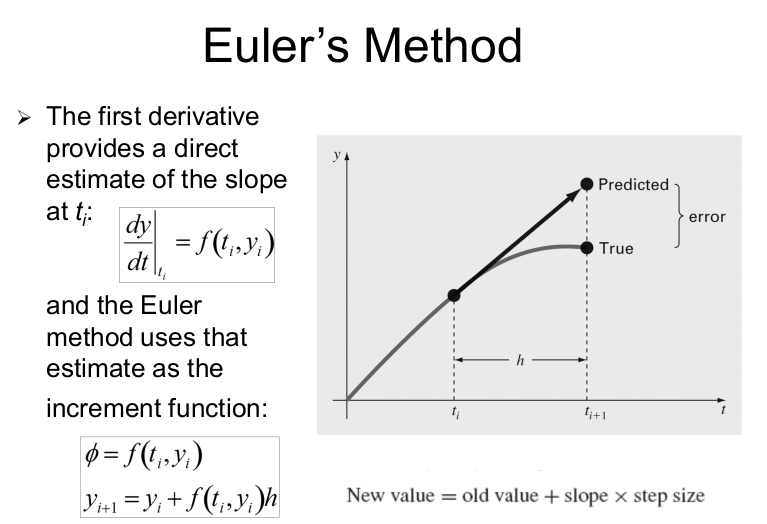$\newcommand{\diff}{\text{d}}
\newcommand{\dydx}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\ddydx}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\pypx}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\unit}[1]{\,\text{#1}}$

## Example
$y'=4e^{0.8t}-0.5y, \;y(t=0)=2$, calculate $y$ for $t\in[0,4]$ with a step size of $h=1$

Analytical solution: $$y=\frac{4}{1.3}\left(e^{0.8t} - e^{-0.5t}\right)+2e^{-0.5t}$$

In [2]:
def yp(t,y):
    # The given y'(t,y) equation
    return 4*np.exp(0.8*t)-0.5*y

Let's show that the given analytical solution is indeed the solution. We calculate the left side ($y'$) of the equation using the differentiation of the analytical solution and right side of the equation by directly plugging in the given analytical solution and compare with each other for various $t$ values.

In [3]:
def dy(t):
    # y' from the analytical solution
    return 4/1.3*(0.8*np.exp(0.8*t)+0.5*np.exp(-0.5*t))-np.exp(-0.5*t)

In [4]:
def y_t(t):
    # true y function (analytical solution)
    return 4/1.3*(np.exp(0.8*t)-np.exp(-0.5*t))+2*np.exp(-0.5*t)

In [5]:
t = np.arange(0,10,0.5)
yp1 = dy(t)
yp2 = 4*np.exp(0.8*t)-0.5*y_t(t)
for tt,i,j in zip(t,yp1,yp2):
    print("{:.1f}: {:10.4f}, {:10.4f}".format(tt,i,j))

0.0:     3.0000,     3.0000
0.5:     4.0915,     4.0915
1.0:     5.8048,     5.8048
1.5:     8.4269,     8.4269
2.0:    12.3902,    12.3902
2.5:    18.3427,    18.3427
3.0:    27.2541,    27.2541
3.5:    40.5727,    40.5727
4.0:    60.4606,    60.4606
4.5:    90.1447,    90.1447
5.0:   134.4396,   134.4396
5.5:   200.5289,   200.5289
6.0:   299.1294,   299.1294
6.5:   446.2295,   446.2295
7.0:   665.6813,   665.6813
7.5:   993.0682,   993.0682
8.0:  1481.4746,  1481.4746
8.5:  2210.0933,  2210.0933
9.0:  3297.0663,  3297.0663
9.5:  4918.6407,  4918.6407


It is even easier to see that the given analytic solution is indeed the solution via plotting both sides of the equation together:

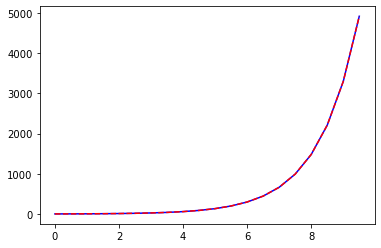

In [6]:
plt.plot(t,yp1,"b",t,yp2,"--r")
plt.show()

**Solving the ODE using Euler Method:**

In [7]:
t = np.arange(1,5)
y = [2]

print("{:>2s}\t{:>8s}\t{:^8s}\t{:>5s}"\
      .format("t","y_Euler","y_true","Err%"))

print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(0,y[0],y_t(0),np.abs(y_t(0)-y[0])/y_t(0)*100))
for i in t:
    slope = yp(i-1,y[i-1])
    y.append(y[i-1]+slope*1)
    print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(i,y[i],y_t(i),np.abs(y_t(i)-y[i])/y_t(i)*100))

 t	 y_Euler	 y_true 	 Err%
 0	 2.00000	 2.00000	 0.00%
 1	 5.00000	 6.19463	19.28%
 2	11.40216	14.84392	23.19%
 3	25.51321	33.67717	24.24%
 4	56.84931	75.33896	24.54%


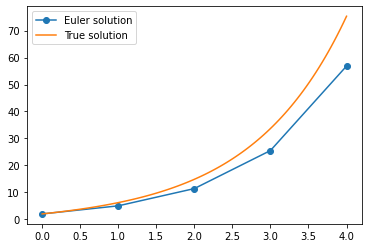

In [8]:
plt.plot(range(5),y,"-o",\
         np.linspace(0,4,100),y_t(np.linspace(0,4,100)),"-")
plt.legend(["Euler solution","True solution"])
plt.show()

# Runge-Kutta Method
**(RK4)**

$$y_{i+1} = y_i+\frac{1}{6}\left(k_1+2k_2+2k_3+k_4\right)h$$

where:
$$k_1 = f(t_i,y_i)\\
k_2= f(t_i+\tfrac{1}{2}h,y_i+\tfrac{1}{2}k_1 h)\\
k_3= f(t_i+\tfrac{1}{2}h,y_i+\tfrac{1}{2}k_2 h)\\
k_4 = f(t_i+h,y_i+k_3 h)$$


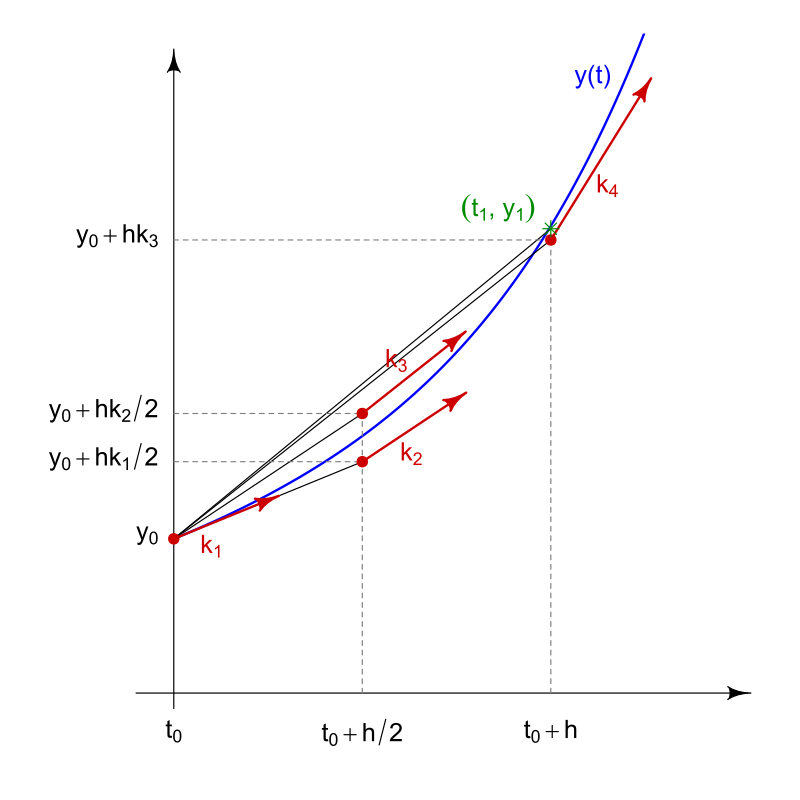
[Image: Wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#/media/File:Runge-Kutta_slopes.svg)

## Example
$y'=4e^{0.8t}-0.5y$, $y(t=0)=2$, calculate $y$ for $t\in[0,4]$ with a step size of $h=1$

Analytical solution: $$y=\frac{4}{1.3}\left(e^{0.8t} - e^{-0.5t}\right)+2e^{-0.5t}$$

In [9]:
def f(t,y):
    return 4*np.exp(0.8*t) - 0.5*y

In [10]:
y = [2]
t = np.arange(5)
h = t[1]-t[0]
print("{:>2s}\t{:>8s}\t{:^8s}\t{:>5s}"\
      .format("t","y_KR4","y_true","Err%"))
for i in range(1,5):
    k1 = f(t[i-1],y[i-1])
    k2 = f(t[i-1]+0.5*h,y[i-1]+0.5*k1*h)
    k3 = f(t[i-1]+0.5*h,y[i-1]+0.5*k2*h)
    k4 = f(t[i-1]+h,y[i-1]+k3*h)
    y.append(y[i-1]+(k1+2*k2+2*k3+k4)*h/6)

for i in range(len(y)):
    print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(i,y[i],y_t(i),np.abs(y_t(i)-y[i])/y_t(i)*100))

 t	   y_KR4	 y_true 	 Err%
 0	 2.00000	 2.00000	 0.00%
 1	 6.20104	 6.19463	 0.10%
 2	14.86248	14.84392	 0.13%
 3	33.72135	33.67717	 0.13%
 4	75.43917	75.33896	 0.13%


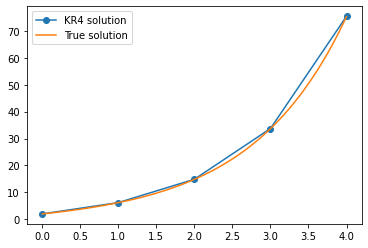

In [11]:
plt.plot(range(5),y,"-o",\
         np.linspace(0,4,100),y_t(np.linspace(0,4,100)),"-")
plt.legend(["KR4 solution","True solution"])
plt.show()

### Example
Solve for the velocity and position of the free-falling bungee jumper assuming at $t=0$, $x=0,\;v=0$ for $t\in[0,10]$ with a step size of 2 seconds.

**Equations**
$$v=\dydx{x}{t}\\
\dydx{v}{t} = g - \frac{c_d}{m}v^2$$

**Values:**
$g=9.81\unit{ m/s}^2$, $m=68.1 \unit{kg}$, $C_d = 0.25 \unit{kg/m}$

# References
* Chapra
* Eda Ã‡elik Akdur, KMU231 Lecture Notes